In [1]:
# convert_rgb_to_tuple(colors[0])

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def convert_rgb_to_tuple(rgb):
    """
    Converts a rgb list or numpy array with values in [0, 255] to a tuple with
    values in [0., 1.]
    """
    return tuple([rgb_val / 255 for rgb_val in rgb])

def ratios_normalized(point, points):
    ratios = points[point]['ratios']
    return [1 / sum(ratios) * i for i in ratios]

def make_piechart_plot(points0, colors):

    fig, ax = plt.subplots()
    size = 600

    points = {}
    for idx, point0 in enumerate(points0):
        points[f'point{idx+1}'] = {'x': idx, 'y': point0[0], 'ratios': point0[1]} 
        
    print(points)

    def markers_out(point, points):
        """
        Function that makes the markers
        Takes in list of list with [r,g,b,y] ratios
        outputs two matrices
        """
        ratio_list = ratios_normalized(point, points)
        r1 = ratio_list[0]   
        r2 = r1 + ratio_list[1]
        r3 = r2 + ratio_list[2]
        x = [0] + np.cos(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
        y = [0] + np.sin(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
        points[point]['xy1'] = np.column_stack([x, y])
        points[point]['s1'] = np.abs(points[point]['xy1']).max()
        x = [0] + np.cos(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
        y = [0] + np.sin(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
        points[point]['xy2'] = np.column_stack([x, y])
        points[point]['s2'] = np.abs(points[point]['xy2']).max()
        x = [0] + np.cos(np.linspace(2 * np.pi * r2, 2 * np.pi * r3, 10)).tolist()
        y = [0] + np.sin(np.linspace(2 * np.pi * r2, 2 * np.pi * r3, 10)).tolist()
        points[point]['xy3'] = np.column_stack([x, y])
        points[point]['s3'] = np.abs(points[point]['xy3']).max()
        x = [0] + np.cos(np.linspace(2 * np.pi * r3, 2 * np.pi, 10)).tolist()
        y = [0] + np.sin(np.linspace(2 * np.pi * r3, 2 * np.pi, 10)).tolist()
        points[point]['xy4'] = np.column_stack([x, y])
        points[point]['s4'] = np.abs(points[point]['xy4']).max()


    def plot_the_point(point, colors):
        x_point = points[point]['x']
        y_point = points[point]['y']
        ax.scatter(x_point, y_point, marker=points[point]['xy1'],
                   s=points[point]['s1'] ** 2 * size, facecolor=convert_rgb_to_tuple(colors[0]))
        ax.scatter(x_point, y_point, marker=points[point]['xy2'],
                   s=points[point]['s2'] ** 2 * size, facecolor=convert_rgb_to_tuple(colors[1]))
        ax.scatter(x_point, y_point, marker=points[point]['xy3'],
                   s=points[point]['s3'] ** 2 * size, facecolor=convert_rgb_to_tuple(colors[2]))
        ax.scatter(x_point, y_point, marker=points[point]['xy4'],
                   s=points[point]['s4'] ** 2 * size, facecolor=convert_rgb_to_tuple(colors[3]))
    
    for point in points:
        markers_out(point, points)
        plot_the_point(point, colors)
    
    plt.show()

In [10]:
colors = [[220.,  35.,  40.],
 [ 73., 213.,   5.],
 [ 54.,  59., 212.],
 [249., 242.,  30.]]

points0 = [[1784., [0.65, 0.0, 0.3, 0.05]],
           [523., [0.805, 1.0, 0.6, 0.05]],
           [100., [0.805, 1.0, 0.6, 1.05]],
           ]

{'point1': {'x': 0, 'y': 1784.0, 'ratios': [0.65, 0.0, 0.3, 0.05]}, 'point2': {'x': 1, 'y': 523.0, 'ratios': [0.805, 1.0, 0.6, 0.05]}, 'point3': {'x': 2, 'y': 100.0, 'ratios': [0.805, 1.0, 0.6, 1.05]}}


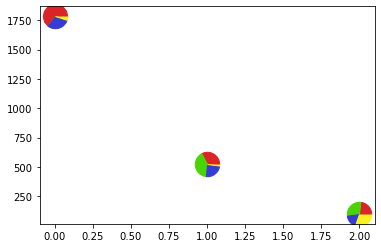

In [11]:
make_piechart_plot(points0, colors)